In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from matplotlib import pyplot as plt
import autograd.numpy as np
from autograd.scipy.special import expit, logit
import pandas as pd
plt.style.use('bmh')


In [2]:
N = 20
U = np.random.rand(N)
T = -(logit(-np.log(U) / 0.5) - np.random.exponential(2, N) - 6.00) / 0.50

E = ~np.isnan(T)
T[np.isnan(T)] = 50

In [3]:
from autograd.scipy.stats import norm
from lifelines.fitters import ParametericUnivariateFitter


class UpperAsymptoteFitter(ParametericUnivariateFitter):

    _fitted_parameter_names = ["c_", "mu_"]

    _bounds = ((0, None), (None, None))

    def _cumulative_hazard(self, params, times):
        c, mu_  = params
        return c * norm.cdf((times - muu) / 6.3, loc=0, scale=1)

1.959963984540054
[[0.0488528  0.09581707 0.16967759 0.2725496  0.39943875 0.53804906
  0.67214356 0.78703046 0.87420169 0.93277734 0.96763512 0.98600548
  0.99457915 0.99812273 0.99941972 0.99984011 0.99996077 0.99999144
  0.99999834 0.99999971]]
[0.0488528  0.09581707 0.16967759 0.2725496  0.39943875 0.53804906
 0.67214356 0.78703046 0.87420169 0.93277734 0.96763512 0.98600548
 0.99457915 0.99812273 0.99941972 0.99984011 0.99996077 0.99999144
 0.99999834 0.99999971]
<lifelines.UpperAsymptoteFitter: fitted with 20 observations, 12 censored>
number of subjects = 20
  number of events = 8
    log-likelihood = -2.002
        hypothesis = c_ != 1

---
    coef  se(coef)  lower 0.95  upper 0.95     p  -log2(p)
c_ 0.524     0.185       0.161       0.888 0.010     6.598


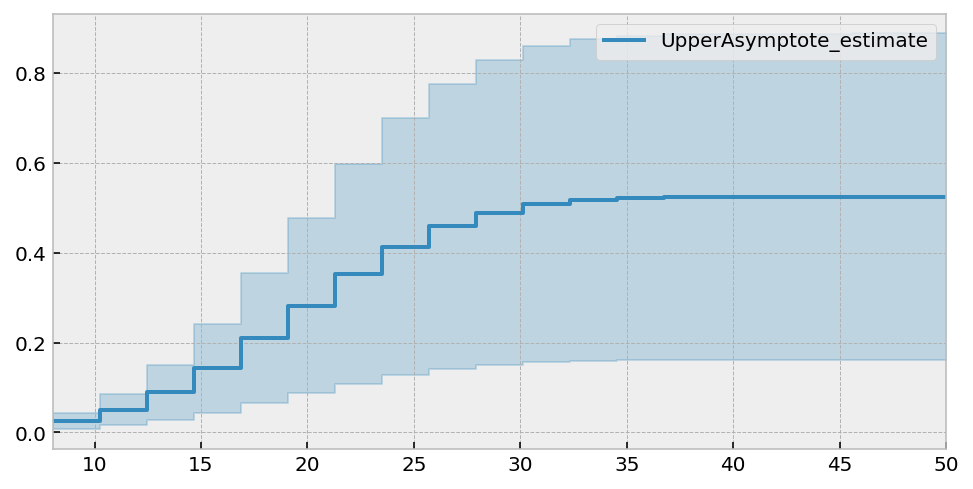

In [4]:
uaf = UpperAsymptoteFitter().fit(T, E)
uaf.print_summary(3)
uaf.plot(figsize=(8,4))

In [12]:
uaf = UpperAsymptoteFitter().fit(T, E, ci_labels=('u', 'l'))

print(uaf.confidence_interval_.iloc[-1]['u'] )
print(uaf.confidence_interval_.iloc[-1]['l'])

1.959963984540054
[[ 2.06626554e-02  4.65884330e-02  9.38365320e-02  1.69506939e-01
   2.76009662e-01  4.07741567e-01  5.50933505e-01  6.87720295e-01
   8.02553472e-01  8.87273646e-01  9.42202444e-01  9.73499516e-01
   9.89170393e-01  9.96065857e-01  9.98732151e-01  9.99638134e-01
   9.99908649e-01  9.99979625e-01  9.99995988e-01  9.99999303e-01]
 [-4.68752360e-03 -9.17892649e-03 -1.57733470e-02 -2.37869832e-02
  -3.14802677e-02 -3.65612479e-02 -3.72638005e-02 -3.33301159e-02
  -2.61619459e-02 -1.80213286e-02 -1.08939934e-02 -5.77924301e-03
  -2.69053314e-03 -1.09923178e-03 -3.94115712e-04 -1.24005733e-04
  -3.42407543e-05 -8.29714009e-06 -1.76440007e-06 -3.29267791e-07]]
0.9848872158475417
0.20171781622293428


In [ ]:
0.524

In [17]:
0.524  - 0.185

0.339

In [18]:
uaf.summary

,coef,se(coef),lower 0.95,upper 0.95,p,-log2(p)
c_,0.593303,0.199792,0.201718,0.984888,4.179032e-02,4.580687
mu_,19.596568,2.111753,15.457609,23.735527,1.698538e-20,65.674268
